In [1]:
from torchvision.ops import box_iou
import os
import pandas as pd
import json
import torch
import seaborn as sns

In [2]:
BASE_DIR = "/home/safal/raavan/smartphone_microscopy/AI_assisted_microscopy_system/"
sample_types = [
    "smartphone_sample",
    "smartphone_reference",
    "brightfield_sample",
    "brightfield_reference",
]
model_type = "faster_rcnn"
sample_type="brightfield_sample"

In [3]:
gt_annotations_file = os.path.join(
    BASE_DIR,
    "cysts_dataset_all",
    sample_type,
    "fold_5",
    f"{sample_type}_coco_annos_val.json",
)
pred_annotations_file = os.path.join(
    BASE_DIR,
    "outputs",
    sample_type,
    model_type,
    "fold_5",
    # "mmdetection_cysts",
    # f"yolov8_{sample_type}_fold_5",
    "results.bbox.json"
)


In [4]:
gt_annos = json.load(open(gt_annotations_file))

In [5]:
pred_annos_df = pd.read_json(pred_annotations_file)

In [6]:
# change bbox format to x1, y1, x2, y2
pred_annos_df["bbox"] = pred_annos_df["bbox"].apply(
    lambda x: [x[0], x[1], x[0] + x[2], x[1] + x[3]]
)

In [7]:
gt_annos['images'][0]

{'id': 1,
 'file_name': '/home/safal/raavan/smartphone_microscopy/AI_assisted_microscopy_system/cysts_dataset_all/brightfield_sample/train/BS0001.jpg',
 'height': 480,
 'width': 640}

In [8]:
# change gt_annos id value to image names
for i in range(len(gt_annos["images"])):
    gt_annos["images"][i]["image_id"] = gt_annos["images"][i]["file_name"].rsplit("/")[-1].split(".")[0]


In [9]:
gt_annos['images'][0]

{'id': 1,
 'file_name': '/home/safal/raavan/smartphone_microscopy/AI_assisted_microscopy_system/cysts_dataset_all/brightfield_sample/train/BS0001.jpg',
 'height': 480,
 'width': 640,
 'image_id': 'BS0001'}

In [10]:
images_df = pd.DataFrame(gt_annos["images"])
gt_annos_df = pd.DataFrame(gt_annos["annotations"])

In [11]:
images_df

,id,file_name,height,width,image_id
0,1,/home/safal/raavan/smartphone_microscopy/AI_as...,480,640,BS0001
1,4,/home/safal/raavan/smartphone_microscopy/AI_as...,480,640,BS0004
2,13,/home/safal/raavan/smartphone_microscopy/AI_as...,480,640,BS0013
3,14,/home/safal/raavan/smartphone_microscopy/AI_as...,480,640,BS0014
4,20,/home/safal/raavan/smartphone_microscopy/AI_as...,480,640,BS0020
...,...,...,...,...,...
196,1040,/home/safal/raavan/smartphone_microscopy/AI_as...,480,640,BS0983
197,1044,/home/safal/raavan/smartphone_microscopy/AI_as...,480,640,BS0987
198,1046,/home/safal/raavan/smartphone_microscopy/AI_as...,480,640,BS0989
199,1056,/home/safal/raavan/smartphone_microscopy/AI_as...,480,640,BS0999


In [12]:
gt_annos_df["bbox"] = gt_annos_df["bbox"].apply(
    lambda x: [x[0], x[1], x[0] + x[2], x[1] + x[3]]
)


In [13]:
gt_annos_df

,image_id,id,category_id,bbox,segmentation,iscrowd,area
0,1,2,0,"[268.0, 432.0, 278.0, 442.0]",[],0,100.000000
1,1,3,0,"[518.0, 361.0, 530.0, 371.0]",[],0,120.000000
2,4,5,1,"[529.2140833378212, 297.5634355704484, 562.785...",[],0,835.036536
3,4,6,1,"[466.9134134481312, 374.45361413506225, 487.08...",[],0,586.893520
4,13,30,1,"[361.11871973472756, 168.8558744429978, 398.88...",[],0,917.186553
...,...,...,...,...,...,...,...
216,963,1012,1,"[241.91607846833455, 219.5085686776027, 266.08...",[],0,748.788962
217,1014,1061,0,"[319.0, 303.0, 331.0, 317.0]",[],0,168.000000
218,1016,1063,0,"[383.0, 165.0, 401.0, 183.0]",[],0,324.000000
219,1046,1080,0,"[498.0, 332.0, 512.0, 346.0]",[],0,196.000000


In [15]:
# replace image_id of gt_annos_df with image_id of images_df
gt_annos_df["image_id"] = gt_annos_df["image_id"].apply(
    lambda x: images_df[images_df["id"] == x]["image_id"].values[0]
)

# replace image_id of pred_annos_df with image_id of images_df
pred_annos_df["image_id"] = pred_annos_df["image_id"].apply(
    lambda x: images_df[images_df["id"] == x]["image_id"].values[0]
)


In [16]:
gt_annos_df

,image_id,id,category_id,bbox,segmentation,iscrowd,area
0,BS0001,2,0,"[268.0, 432.0, 278.0, 442.0]",[],0,100.000000
1,BS0001,3,0,"[518.0, 361.0, 530.0, 371.0]",[],0,120.000000
2,BS0004,5,1,"[529.2140833378212, 297.5634355704484, 562.785...",[],0,835.036536
3,BS0004,6,1,"[466.9134134481312, 374.45361413506225, 487.08...",[],0,586.893520
4,BS0013,30,1,"[361.11871973472756, 168.8558744429978, 398.88...",[],0,917.186553
...,...,...,...,...,...,...,...
216,BS0906,1012,1,"[241.91607846833455, 219.5085686776027, 266.08...",[],0,748.788962
217,BS0957,1061,0,"[319.0, 303.0, 331.0, 317.0]",[],0,168.000000
218,BS0959,1063,0,"[383.0, 165.0, 401.0, 183.0]",[],0,324.000000
219,BS0989,1080,0,"[498.0, 332.0, 512.0, 346.0]",[],0,196.000000


In [17]:
pred_annos_df

,image_id,bbox,score,category_id
0,BS0001,"[518.3383178710938, 357.91217041015625, 530.08...",0.984015,0
1,BS0001,"[266.4512634277344, 430.5737609863281, 279.110...",0.934073,0
2,BS0004,"[541.9117431640625, 90.74610900878906, 554.394...",0.804585,0
3,BS0004,"[528.6170043945312, 299.0773620605469, 563.428...",0.998632,1
4,BS0004,"[468.0694274902344, 371.1058044433594, 486.616...",0.998072,1
...,...,...,...,...
359,BS0999,"[311.8299560546875, 330.4395751953125, 325.900...",0.370893,0
360,BS0999,"[28.855241775512695, 429.0587463378906, 43.833...",0.087883,0
361,BS0999,"[489.2289733886719, 139.02957153320312, 513.99...",0.985613,1
362,BS1003,"[285.316162109375, 285.7833557128906, 298.3072...",0.905366,0


In [18]:
categories = sorted(gt_annos_df.category_id.unique())

    # dataframe to store the precision, recall and f1 score for each class
metrics_df = pd.DataFrame(
    columns=["category", "precision", "recall", "f1_score", "TP", "FP"]
)

In [19]:
precisions = dict(
    (category, []) for category in categories
)
recalls = dict((category, []) for category in categories)


In [20]:
precisions

{0: [], 1: []}

In [21]:
# for category in categories:
category = 1
# get the ground truth annotations for the current class
gt_annos_df_class = gt_annos_df[
    gt_annos_df.category_id == category
]
# get the predicted annotations for the current class
pred_annos_df_class = pred_annos_df[
    pred_annos_df.category_id == category
]

# sort the predicted annotations by score
pred_annos_df_class = pred_annos_df_class.sort_values(
    by="score", ascending=False
)

# filter predictions with score > 0.001
# pred_annos_df_class = pred_annos_df_class[
#     pred_annos_df_class.score > 0.3
# ]

true_positives_class = 0
false_positives_class = 0

# get image ids for the current class from both ground truth and predicted annotations
image_ids = pred_annos_df_class["image_id"].unique()
images_len = len(image_ids)


In [22]:
pred_annos_df_class

,image_id,bbox,score,category_id
308,BS0805,"[126.77021026611328, 81.20881652832031, 155.85...",0.999610,1
87,BS0187,"[319.3728942871094, 267.1075134277344, 339.845...",0.999555,1
155,BS0397,"[382.88299560546875, 150.63157653808594, 418.6...",0.999256,1
20,BS0052,"[564.9611206054688, 125.46453094482422, 598.40...",0.999181,1
179,BS0471,"[277.1153869628906, 270.3267517089844, 298.039...",0.998935,1
...,...,...,...,...
263,BS0726,"[447.940185546875, 276.1542053222656, 463.4423...",0.081697,1
160,BS0406,"[447.940185546875, 276.1542053222656, 463.4423...",0.081697,1
302,BS0779,"[402.3310241699219, 172.79525756835938, 417.98...",0.071190,1
238,BS0654,"[375.3856506347656, 249.15321350097656, 389.51...",0.063753,1


In [23]:
set(pred_annos_df_class["image_id"].unique()).intersection(set(gt_annos_df_class["image_id"].unique()))

{'BS0004',
 'BS0013',
 'BS0020',
 'BS0040',
 'BS0047',
 'BS0052',
 'BS0058',
 'BS0187',
 'BS0189',
 'BS0191',
 'BS0205',
 'BS0214',
 'BS0216',
 'BS0217',
 'BS0288',
 'BS0295',
 'BS0308',
 'BS0330',
 'BS0337',
 'BS0339',
 'BS0343',
 'BS0366',
 'BS0372',
 'BS0378',
 'BS0379',
 'BS0385',
 'BS0387',
 'BS0389',
 'BS0392',
 'BS0397',
 'BS0471',
 'BS0475',
 'BS0476',
 'BS0553',
 'BS0555',
 'BS0560',
 'BS0561',
 'BS0562',
 'BS0563',
 'BS0564',
 'BS0565',
 'BS0566',
 'BS0573',
 'BS0574',
 'BS0592',
 'BS0766',
 'BS0804',
 'BS0805',
 'BS0906'}

In [24]:
image_ids

array(['BS0805', 'BS0187', 'BS0397', 'BS0052', 'BS0471', 'BS0476',
       'BS0766', 'BS0389', 'BS0555', 'BS0004', 'BS0561', 'BS0217',
       'BS0020', 'BS0379', 'BS0205', 'BS0565', 'BS0385', 'BS0047',
       'BS0191', 'BS0330', 'BS0574', 'BS0392', 'BS0387', 'BS0795',
       'BS0337', 'BS0563', 'BS0804', 'BS0372', 'BS0553', 'BS0573',
       'BS0013', 'BS0343', 'BS0339', 'BS0288', 'BS0562', 'BS0906',
       'BS0475', 'BS0560', 'BS0295', 'BS0308', 'BS0189', 'BS0564',
       'BS0040', 'BS0592', 'BS0999', 'BS0034', 'BS0378', 'BS0214',
       'BS0366', 'BS0216', 'BS0058', 'BS0504', 'BS0964', 'BS0391',
       'BS0955', 'BS0683', 'BS0775', 'BS0738', 'BS0949', 'BS0987',
       'BS0719', 'BS0957', 'BS0895', 'BS0768', 'BS0566', 'BS0725',
       'BS0474', 'BS0230', 'BS0160', 'BS1003', 'BS0313', 'BS0763',
       'BS0699', 'BS0170', 'BS0726', 'BS0406', 'BS0779', 'BS0654'],
      dtype=object)

In [25]:

# for image in image_ids:
image = "BS0013"
# get the ground truth annotations for the current image
gt_annos_df_image = gt_annos_df_class[
    gt_annos_df_class.image_id == image
]
# get the predicted annotations for the current image
pred_annos_df_image = pred_annos_df_class[
    pred_annos_df_class.image_id == image
]

# get the ground truth bounding boxes
gt_bboxes = list(gt_annos_df_image.bbox.values)
gt_bboxes = torch.tensor(gt_bboxes)

# get the predicted bounding boxes
pred_bboxes = list(pred_annos_df_image.bbox.values)
pred_bboxes = torch.tensor(pred_bboxes)


In [26]:

# if len(gt_bboxes) == 0:
#     false_positives_class += len(pred_bboxes)
#     precisions[category].append(
#         true_positives_class / (true_positives_class + false_positives_class)
#     )
#     recalls[category].append(
#         true_positives_class / gt_annos_df_class.shape[0]
#     )
#     continue


In [27]:
gt_bboxes

tensor([[361.1187, 168.8559, 398.8813, 193.1441],
        [259.8486,  24.6146, 280.1514,  57.3854],
        [180.7861, 288.7351, 203.2139, 327.2649]])

In [28]:
pred_bboxes

tensor([[360.9497, 168.0306, 398.3708, 194.0853],
        [180.6326, 289.0701, 204.0133, 326.4426],
        [260.1142,  24.3126, 279.8101,  56.9491]])

In [29]:

# get the intersection over union for each predicted bounding box
ious = box_iou(pred_bboxes, gt_bboxes)


In [30]:
ious

tensor([[0.9163, 0.0000, 0.0000],
        [0.0000, 0.0000, 0.9316],
        [0.0000, 0.9487, 0.0000]])

In [31]:

# get the maximum iou for each ground truth bounding box
max_ious, max_idxs = torch.max(ious, dim=1)


In [32]:
max_ious , max_idxs

(tensor([0.9163, 0.9316, 0.9487]), tensor([0, 2, 1]))

In [33]:
gt_matched = torch.zeros(gt_bboxes.shape[0])

In [34]:
gt_matched

tensor([0., 0., 0.])

In [35]:
for i, pred_bbox in enumerate(pred_bboxes):
    iou_pred, gt_idx = max_ious[i], max_idxs[i]
    if iou_pred > 0.5:
        if gt_matched[gt_idx] == 0:
            true_positives_class += 1
            gt_matched[gt_idx] = 1
        else:
            false_positives_class += 1
    else:
        false_positives_class += 1


In [36]:
true_positives_class

3

In [37]:

# get the indices of the predicted bounding boxes with iou > 0.5
tp_indices = torch.where(max_ious >= 0.5)[0]
# print(ious)

# get the indices of the predicted bounding boxes with iou < 0.5
fp_indices = torch.where(max_ious < 0.5)[0]


In [38]:
fp_indices

tensor([], dtype=torch.int64)

In [39]:

# update the true positives and false positives
true_positives_class += len(tp_indices)
false_positives_class += len(fp_indices)
precisions[category].append(
    true_positives_class / (true_positives_class + false_positives_class)
)
recalls[category].append(
    true_positives_class / gt_annos_df_class.shape[0]
)

# calculate the precision and recall
precision = true_positives_class / (
true_positives_class + false_positives_class
)
recall = true_positives_class / gt_annos_df_class.shape[0]

category_name = gt_annos["categories"][category]["name"]
f1_score = 2 * (precision * recall) / (precision + recall)

category_metrics_df = pd.DataFrame(
{
    "category": category_name,
    "precision": precision,
    "recall": recall,
    "f1_score": f1_score,
    "TP": true_positives_class,
    "FP": false_positives_class,
},
index=[0],
)

# concatenate the metrics for the current class to the metrics dataframe
metrics_df = pd.concat([metrics_df, category_metrics_df], axis=0)


In [40]:
metrics_df

,category,precision,recall,f1_score,TP,FP
0,Giardia,1.0,0.088235,0.162162,6,0


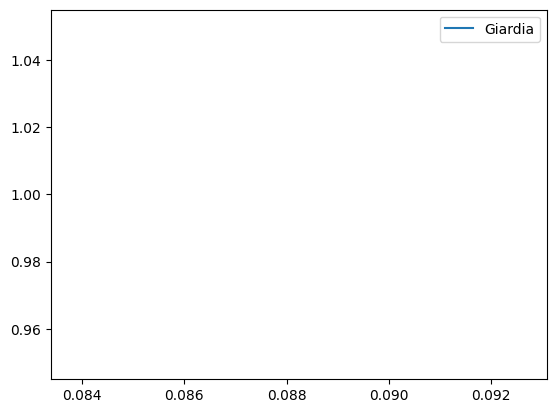

In [41]:
# plot the precision recall curve
for category in categories:
    sns.lineplot(
        x=recalls[category],
        y=precisions[category],
        label=gt_annos["categories"][category]["name"],
        
    )


